<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Statistics_For_Astronomers_20231025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demonstration of error propagation using Monte Carlo

In [29]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

##### We'll start with a relatively low error on the magnitude (i.e., good quality photometry)

In [30]:
flux_Vega = 7500 # Vega zeropoint in that filter
mag_mean = 12.5
mag_err = 0.5

##### Differentiate the flux w.r.t. the magnitude. The Taylor Series up to first order will then set the flux uncertainty.<br>
##### It is assumed that the flux distribution will also be Gaussian around the mean value, with standard deviation equal to the propagated uncertainty.<br><br>

##### $F = F_{_{\rm Vega}}\ 10^{^{-\displaystyle{m\over 2.5}}} = F_{_{\rm Vega}}\ e^{^{-\displaystyle{\ln{(10.0)}\ m\over 2.5}}}$<br><br>

##### $\Delta F \approx \Big|\displaystyle{dF\over dm}\Big|\ \Delta m = \displaystyle{\ln{(10.0)}\over 2.5}\ F_{_{\rm Vega}}\ e^{^{-\displaystyle{\ln{(10.0)}\ m\over 2.5}}} \Delta m= \displaystyle{\ln{(10.0)}\over 2.5}\ F\ \Delta m$

In [31]:
# Use partial derivatives and the Taylor Approximation
flux_mean = flux_Vega * 10**(-mag_mean / 2.5)
flux_err = flux_mean * mag_err * np.log(10) / 2.5
print(f"The mean flux and flux uncertainty are {flux_mean:4.3e} and {flux_err:4.3e} respectively")

The mean flux and flux uncertainty are 7.500e-02 and 3.454e-02 respectively


##### The Monte Carlo method draws realisations from the magnitude distribution (which is given to be Gaussian), then computes the flux for each realisation. This can be used to determine the actual distribution as well as a standard deviation and a 68\% equal-tailed CI.

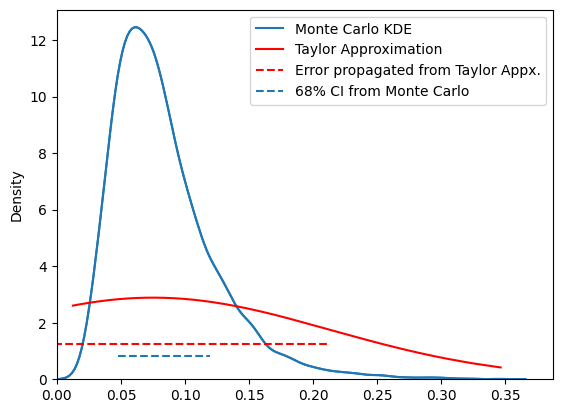

In [42]:
mag = norm.rvs(loc=12.5, scale=0.5, size=10000)
mag = np.sort(mag) # only for plotting convenience

flux = flux_Vega * 10**(-mag / 2.5)
CI_flux = np.percentile(flux, [16, 84]) # 68% equal-tailed CI

_ = sns.kdeplot(flux, label='Monte Carlo KDE', color=sns.color_palette()[0])
max_density = np.max(sns.kdeplot(flux).get_lines()[0].get_data()[1])
_ = plt.plot(flux, norm.pdf(flux, loc=flux_mean, scale=flux_err), label='Taylor Approximation', color='red')
_ = plt.plot([flux_mean - flux_err, flux_mean + flux_err],
 [max_density / 10, max_density / 10], label='Error propagated from Taylor Appx.', color='red', linestyle='--')
# counts, _, _ = plt.hist(flux, histtype='step', density=True, label='Monte Carlo')
# max_counts = np.max(counts)
_ = plt.plot(CI_flux, [max_density / 15, max_density / 15], label='68% CI from Monte Carlo', color=sns.color_palette()[0], linestyle='--')
xlim = list(plt.xlim())
xlim[0] = 0.0
_ = plt.xlim(xlim)
_ = plt.legend(loc='best')

##### Now let's try that with VERY bad photometry!

The mean flux and flux uncertainty are 7.500e-02 and 1.382e-01 respectively


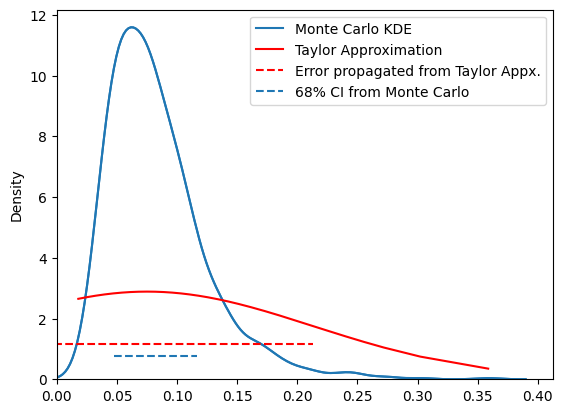

In [44]:
flux_Vega = 7500 # Vega zeropoint in that filter
mag_mean = 12.5
mag_err = 2
# Use partial derivatives and the Taylor Approximation
flux_mean = flux_Vega * 10**(-mag_mean / 2.5)
flux_err = flux_mean * mag_err * np.log(10) / 2.5
print(f"The mean flux and flux uncertainty are {flux_mean:4.3e} and {flux_err:4.3e} respectively")
mag = norm.rvs(loc=12.5, scale=0.5, size=1000)
mag = np.sort(mag) # only for plotting convenience

flux = flux_Vega * 10**(-mag / 2.5)
CI_flux = np.percentile(flux, [16, 84]) # 68% equal-tailed CI

_ = sns.kdeplot(flux, label='Monte Carlo KDE', color=sns.color_palette()[0])
max_density = np.max(sns.kdeplot(flux).get_lines()[0].get_data()[1])
_ = plt.plot(flux, norm.pdf(flux, loc=flux_mean, scale=flux_err), label='Taylor Approximation', color='red')
_ = plt.plot([flux_mean - flux_err, flux_mean + flux_err],
 [max_density / 10, max_density / 10], label='Error propagated from Taylor Appx.', color='red', linestyle='--')
# counts, _, _ = plt.hist(flux, histtype='step', density=True, label='Monte Carlo')
# max_counts = np.max(counts)
_ = plt.plot(CI_flux, [max_density / 15, max_density / 15], label='68% CI from Monte Carlo', color=sns.color_palette()[0], linestyle='--')
xlim = list(plt.xlim())
xlim[0] = 0.0
_ = plt.xlim(xlim)
_ = plt.legend(loc='best')